# **HW6 for Nonlinear Control Systems** 

> Instructor: Dr. Le Yi Wang  
> **Solutions given by Yuqi Wang**   
> Email: he1173@wayne.edu     
> Date: 11.29.2021

## Descriptions
- Source codes are and will be uploaded and updated to [Github repo](https://github.com/BoomAmplifier/NLS-HW.git).  
- *Jupyter Notebook* and *python3* are used in the solutions.

## Solutions  
Consider the nonlinear system:
$$\ddot{x}=-a\dot{x}|\dot{x}|+x\sin{x}+bu$$    
where $u$ is the control signal.    
#### Problem 1: 
(1) Suppose $a$ and $b$ are exactly known with $a=1$ and $b=1$. Design a feedback controller which will stabilize the system by using the sliding surface    
$$ s=\dot{x}+x$$  
(2) Verify your design via simulation.

**Solution:**    


$$\ddot{x}=-\dot{x}|\dot{x}|+x\sin{x}+u$$
$$\dot{s}=\ddot{x}+\dot{x}=-\dot{x}|\dot{x}|+x\sin{x}+u+\dot{x}=f(\dot{x},x)+\dot{x}+u$$
Let $$\dot{s}=v$$
Design $$v=-3s$$


Actual control $u$:
$$\begin{equation}
\begin{array}{}
u&=&v-f(\dot{x},x)-\dot{x} \\
&=&v+\dot{x}|\dot{x}|-x\sin{x}-\dot{x} \\
&=&-3s+\dot{x}|\dot{x}|-x\sin{x}-\dot{x} \\
&=&-3(\dot{x}+x)+\dot{x}|\dot{x}|-x\sin{x}-\dot{x}  \\
&=&-4\dot{x}+\dot{x}|\dot{x}|-x\sin{x}-3x  \\
\end{array}
\end{equation}$$

Closed-loop system:
$$\begin{equation}
\begin{array}{rCl}
\ddot{x} &=& -\dot{x}|\dot{x}| + x\sin{x} -4\dot{x}+\dot{x}|\dot{x}|-x\sin{x}-3x \\
&=&  -4\dot{x}-3x \\
\ddot{x}+4\dot{x}+3x&=& 0
\end{array}
\end{equation}$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from scipy import signal
import control
%matplotlib inline

#### Problem 2: 
(1) Suppose $a$ is uncertain with $1<a<1.5$ and $b=1$. Design a feedback controller which will stabilize the system by using the sliding surface    
$$ s=\dot{x}+x$$  
(2) Verify your design via simulation.

**Solution:**   

$$\ddot{x}=-1.25\dot{x}|\dot{x}|+(1.25-a)\dot{x}|\dot{x}|+x\sin{x}+u=-1.25\dot{x}|\dot{x}|+\Delta+x\sin{x}+u$$
$$|\Delta|=|(1.25-a)\dot{x}|\dot{x}|| \leq F(x,\dot{x})=0.25\dot{x}^2$$
$$\dot{s}=\ddot{x}+\dot{x}=-1.25\dot{x}|\dot{x}|+x\sin{x}+u+\dot{x}+\Delta$$
Let $$\dot{s}=\Delta+v$$
Design $$v=-5sign(s)-Fsign(s)$$
$$\dot{s}=-5sign(s)-0.25\dot{x}^2sign(s)+\Delta$$
Actual control:

$$\begin{equation}
\begin{array}{rCl}
u &=& -5sign(s)-0.25\dot{x}^2sign(s)+\Delta+1.25\dot{x}|\dot{x}|-x\sin{x}+u-\dot{x}-\Delta \\
&=& -(5+0.25\dot{x}^2)sign(\dot{x}+x)+1.25\dot{x}|\dot{x}|-x\sin{x}-\dot{x}
\end{array}
\end{equation}
$$

Check:
$$V(s)=\frac{1}{2}s^2$$
$$\begin{equation}
\begin{array}{rCl}
\dot{V} &=& sv+s\Delta \\
&=& -5|s|-0.25\dot{x}^2|s| +s\Delta \\
&\leq & -5|s| \\
&<& 0     
\end{array}
\end{equation}
$$
When $s\neq 0$

V(s) is a strict radially unbounded Lyapunov function for $s=0$, under any uncertainty that is bounded by $F$. $s=0$ is globally asymptotically stable.

The state equation of the system is:
$$\begin{equation}
\left\{
\begin{array}{rCl}
\dot{x_1}&=&x_2 \\
\dot{x_2}&=&bu-1.25x_2|x_2|+x_1\sin{x_1}+\Delta  \\
&=&bu+f+\Delta
\end{array}
\right.
\end{equation}
$$      

$$\begin{equation}
\left\{
\begin{array}{rCl}
u&=& -(5+0.25x_2^2)sign(x_2+x_1)+1.25x_2|x_2|-x_1\sin{x_1}-\dot{x_1} \\
f&=& -1.25x_2|x_2|+x_1\sin{x_1}\\
\Delta &=& (1.25-a)x_2|x_2|
\end{array}
\right.
\end{equation}
$$

#### Problem 3: 
(1) Suppose $a=1$ and $b$ is uncertain with $0.5<b<1.5$. Design a feedback controller which will stabilize the system by using the sliding surface    
$$ s=\dot{x}+x$$  
(2) Verify your design via simulation.

**Solution:**   

$$\ddot{x}=-\dot{x}|\dot{x}|+x\sin{x}+bu=-\dot{x}|\dot{x}|+x\sin{x}+\frac{b}{\hat{b}}\hat{b}u=-\dot{x}|\dot{x}|+x\sin{x}+\alpha\hat{b}u$$
$$0<0.5 \leq b \leq 1.5$$
$$ \hat{b}=\sqrt{0.5 \times 1.5} = \frac{\sqrt{3}}{2}$$
$$0< \frac{\sqrt{3}}{3} \leq \alpha \leq \sqrt{3}$$
$$\dot{s}=\ddot{x}+\dot{x}=-\dot{x}|\dot{x}|+x\sin{x}+\frac{\sqrt{3}}{2}\alpha u +\dot{x}$$

Design $\eta = 1$
$$\begin{equation}
\begin{array}{rCl}
\hat{b}u &=& -k(x,\dot{x})sign(s)-f(x,\dot{x})-\dot{x} \\
\frac{\sqrt{3}}{2}u &=& -\left[ (\sqrt{3} + (3-\sqrt{3})|f(x,\dot{x})+\dot{x}|\right]sign(s)-f(x,\dot{x})-\dot{x} \\
&=& -3\left|-\dot{x}|\dot{x}|+x\sin{x}+\dot{x}\right|sign(s)-\left[-\dot{x}|\dot{x}|+x\sin{x}+\dot{x} \right]
\end{array}
\end{equation}
$$


Check: $V(s)=\frac{1}{2}s^2$
$$\dot{V}\leq -|s|<0$$
When $s\neq 0 $

V(s) is a strict radially unbounded Lyapunov function for $s=0$, under any uncertainty on $b$. $s=0$ is globally asymptotically stable.

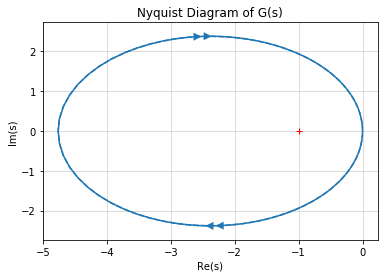

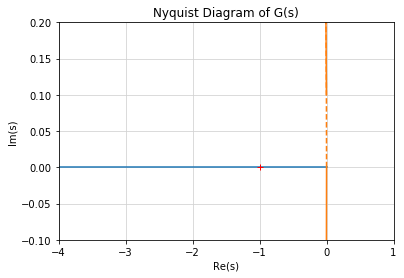

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sympy import *
import control
%matplotlib inline

#Creating a transfer function G
s = control.TransferFunction.s

K0 = 1
# T = 10
G = K0*-10*s / (s**2+2.1*(s)+100)

control.nyquist(G)

plt.grid(True)
plt.title('Nyquist Diagram of G(s)')
plt.xlabel('Re(s)')
plt.ylabel('Im(s)')
# plt.ylim(-1,1)
# plt.xlim(-0.4,1.5)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
x1 = np.linspace(-10,-0,5,endpoint=True)
y1 = 0*x1
ax.plot(x1,y1)
control.nyquist(G)
plt.grid(True)
plt.title('Nyquist Diagram of G(s)')
plt.xlabel('Re(s)')
plt.ylabel('Im(s)')
plt.ylim(-.1,.2)
plt.xlim(-4,1)
plt.show()
